# BigData Assignment

## 20223888 이선우

### 1. Ch2 실습 (3)의 1~5까지 동일하게 실행

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
creditdata = pd.read_csv('./Data/creditcard.csv')

In [3]:
y = creditdata["Class"] 
X = creditdata.loc[:, creditdata.columns != 'Class']
X = X.drop('Time', axis=1)

X.isnull().values.any()

False

In [4]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

### 2. 데이터 특성 탐색

In [7]:
print('사기 거래 갯수 : ', (y == 1).sum(), '\n',\
      '정상 거래 갯수 : ', (y==0).sum(), '\n',\
      '사기 비율 : ', (y == 1).sum() / len(y))

사기 거래 갯수 :  492 
 정상 거래 갯수 :  284315 
 사기 비율 :  0.001727485630620034


Highly Imbalanced Data

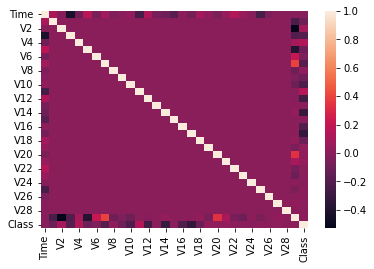

In [11]:
sns.heatmap(creditdata.corr())

Feature중에 중요한걸 뽑아보자

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# model = LogisticRegression(multi_class='multinomial', C=10, random_state=42)
# rfe = RFE(model, n_features_to_select=14, verbose=1)
# rfefit = rfe.fit(X_train, y_train)

Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


In [ ]:
# X_train[:, rfefit.get_support()].shape, rfefit.get_support()

((227845, 14),
 array([False, False, False,  True,  True, False, False,  True,  True,
         True, False, False,  True,  True, False,  True, False, False,
        False,  True,  True,  True, False,  True,  True, False,  True,
        False, False]))

In [ ]:
# X_train_refcv = X_train[:, rfefit.get_support()]
# X_train_refcv_index = X.columns[rfefit.get_support()]

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# model2 = LogisticRegression(multi_class='multinomial', C=0.5, random_state=42)
# rfe2 = RFE(model2, n_features_to_select=14, verbose=1)
# rfefit2 = rfe2.fit(X_train, y_train)

Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


In [ ]:
# X_train[:, rfefit2.get_support()].shape, rfefit2.get_support()

((227845, 14),
 array([False, False, False,  True,  True, False, False,  True,  True,
         True, False, False,  True,  True, False,  True, False, False,
        False,  True,  True,  True, False,  True,  True, False,  True,
        False, False]))

n_feature 난감쓰 > 따라서 자동으로 결정해주는 rfecvfit 사용해보기 

In [ ]:
# from sklearn.feature_selection import RFECV
# model = LogisticRegression()
# rfecv = RFECV(model, cv=5)
# rfecvfit = rfecv.fit(X_train, y_train)

In [ ]:
# rfecvfit_selected_values = X.columns[rfecvfit.get_support()]
# rfecvfit_selected_values, len(rfecvfit_selected_values)

(Index(['V1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15',
        'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V24', 'V25', 'V27', 'V28',
        'Amount'],
       dtype='object'), 22)

In [ ]:
# X_train_rfecvfit = X_train[:, rfecvfit.get_support()]

# X_train_rfecvfit.shape

(227845, 22)

RUD 이후 FS하는게 낫다

In [ ]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

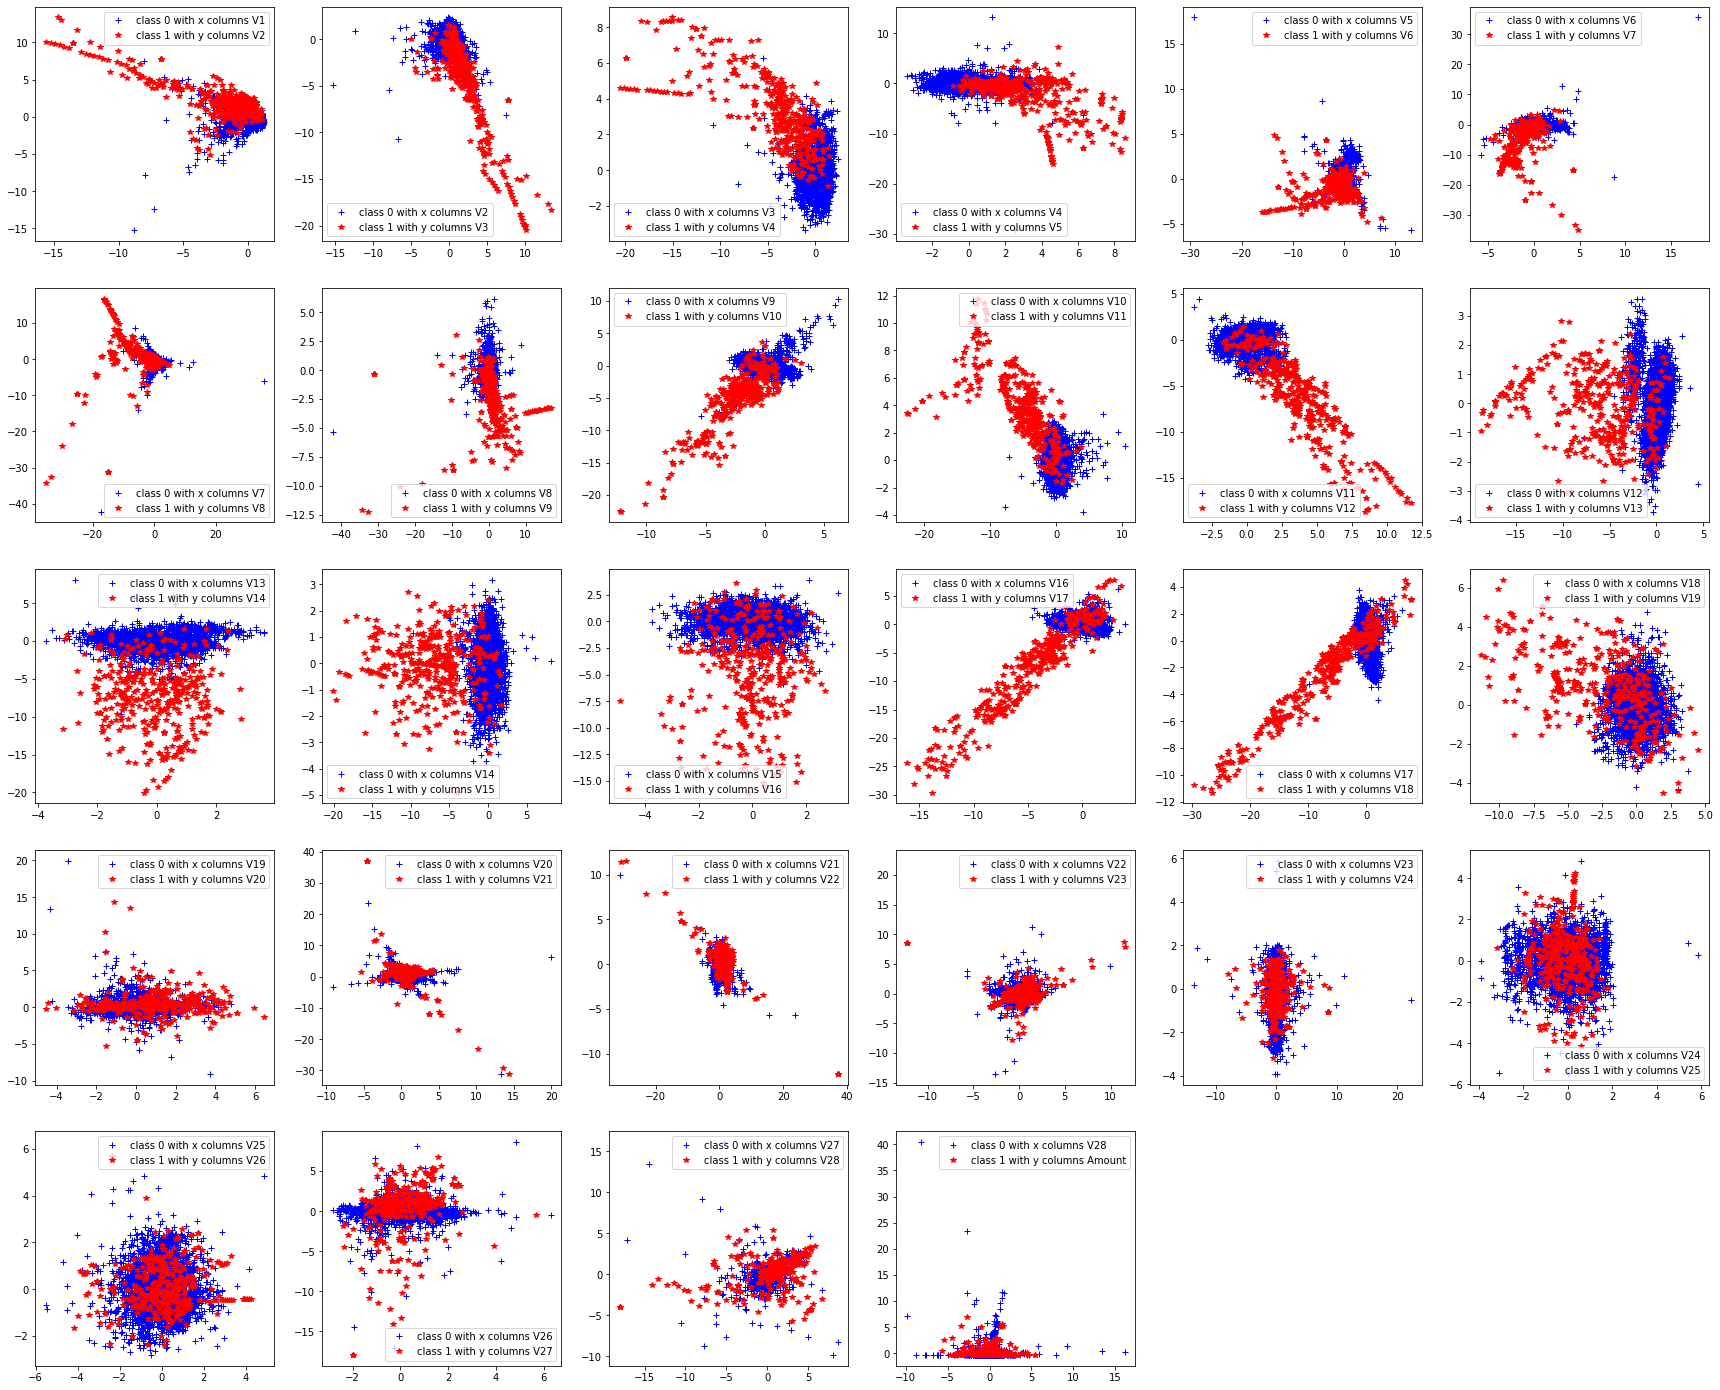

(4334, 29)
(4334,)
0    3940
1     394
Name: Class, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=0.1)

UX, Uy = RUS.fit_resample(X_train, y_train)

yplot_num = 5
xplot_num = int(np.round(len(X_train[0,:]), -1)/yplot_num)

plt.figure(figsize=(xplot_num * 5, yplot_num * 5))
for idx, x in enumerate(X.columns):
    if idx == len(X.columns)-1:
        break
    else:
        plt.subplot(yplot_num, xplot_num, idx+1)
        plt.plot(UX[Uy==0, idx], UX[Uy==0, idx+1], 'b+', label=f'class 0 with x columns {X.columns[idx]}')
        plt.plot(UX[Uy==1, idx], UX[Uy==1, idx+1], 'r*', label=f'class 1 with y columns {X.columns[idx+1]}')
        plt.legend()

plt.show()
print(UX.shape, Uy.shape, Uy.value_counts(), sep='\n')

In [ ]:
UX.shape, Uy.shape, Uy.value_counts()

((4334, 29), (4334,), 0    3940
 1     394
 Name: Class, dtype: int64)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv2 = RFECV(model, cv=10)
rfecvfit2 = rfecv2.fit(UX, Uy)

rfecvfit2_selected_values = X.columns[rfecvfit2.get_support()]
print(rfecvfit2_selected_values, len(rfecvfit2_selected_values), sep='\n')

X_train_rfecvfit2 = UX[:, rfecvfit2.get_support()]

print(X_train_rfecvfit2.shape)

Index(['V4', 'V6', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V22', 'V24'], dtype='object')
10
(4334, 10)


22개의 Feature가 선택됨, cv 다르게 하면 몇개 골라지는지 보기

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv2 = RFECV(model, cv=20)
rfecvfit2 = rfecv2.fit(X_train, y_train)

rfecvfit2_selected_values = X.columns[rfecvfit2.get_support()]
print(rfecvfit2_selected_values, len(rfecvfit2_selected_values), sep='\n')

X_train_rfecvfit2 = X_train[:, rfecvfit2.get_support()]

print(X_train_rfecvfit2.shape)

Index(['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V13', 'V14',
       'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V24', 'V25', 'V27',
       'V28', 'Amount'],
      dtype='object')
23
(227845, 23)


데이터의 불균형이 심하며, 대용량 데이터이다.

먼저 Features들 체크 > RFECV를 통해 21개의 Feature로 차원을 축소했다.

Oversampling을 진행한다 > 이상치나 노이즈의 영향이 커지나, 사기거래를 탐지하는 것인 만큼, 보수적인 접근이 필요해 보인다. 

Undersampling을 진행한다 > 


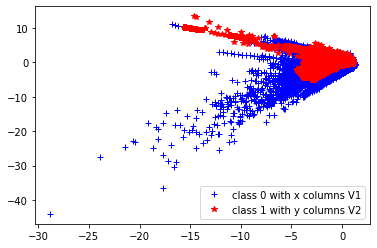

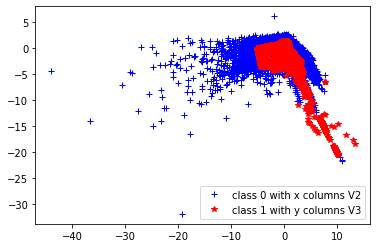

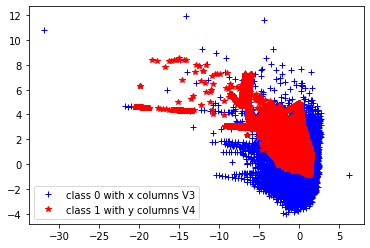

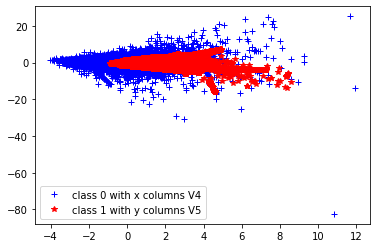

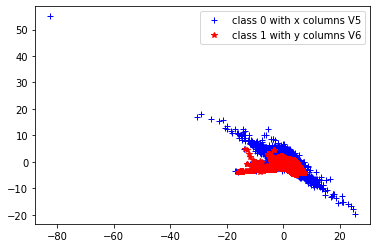

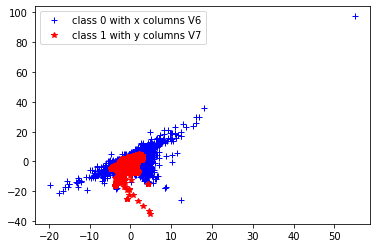

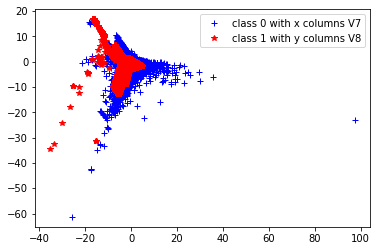

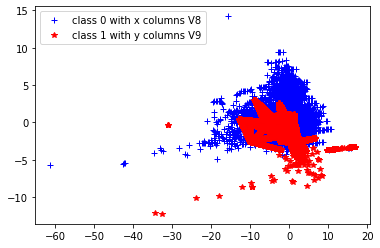

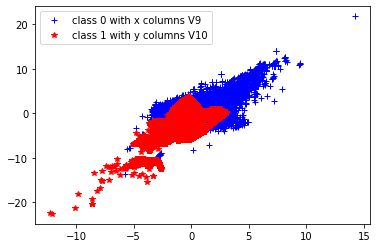

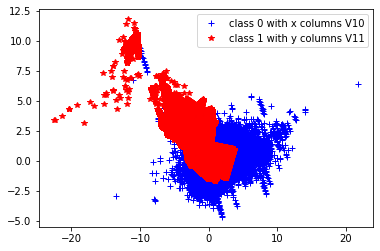

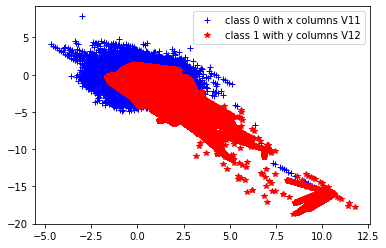

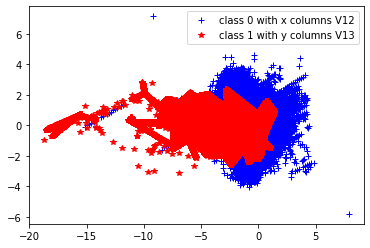

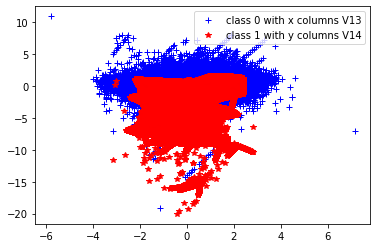

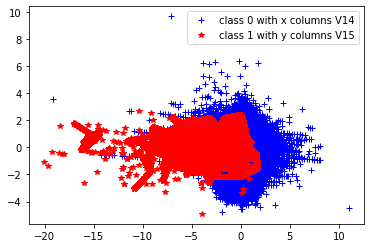

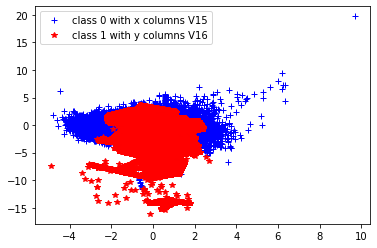

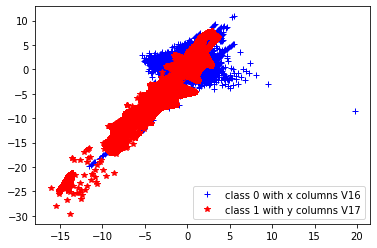

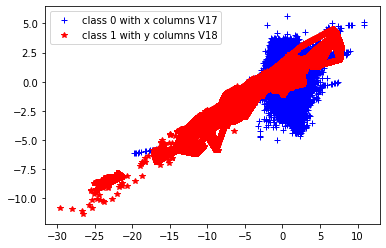

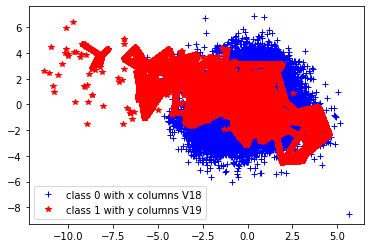

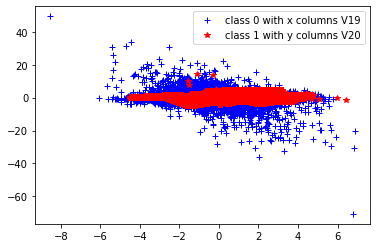

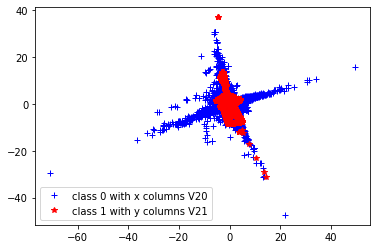

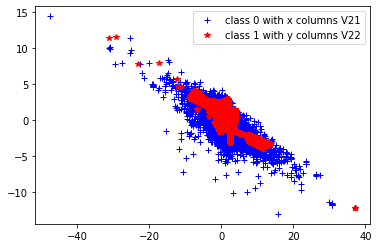

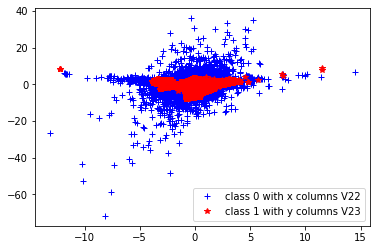

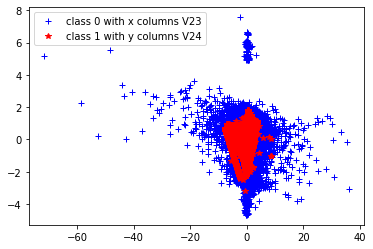

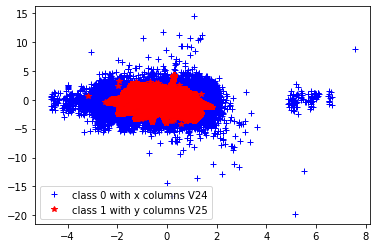

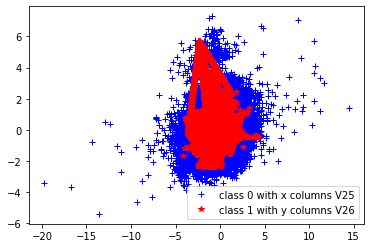

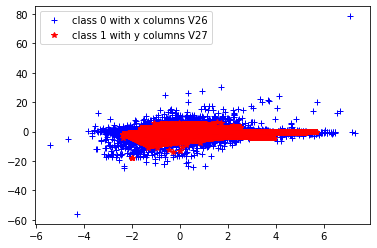

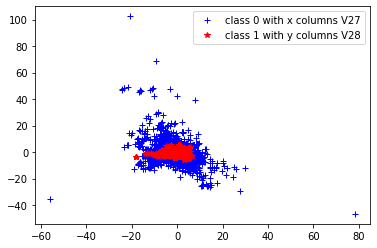

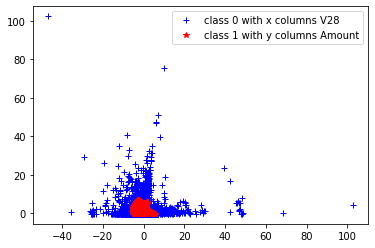

In [ ]:
# '''Oversampling후 특성변수 1, 2에 대한 Classification 모양 plotting'''

# from imblearn.over_sampling import ADASYN
# oversample2 = ADASYN()
# OX2, Oy2 = oversample2.fit_resample(X_train, y_train)

# for idx, x in enumerate(X.columns):
#   if idx == len(X.columns)-1:
#     break
#   else:
#     plt.plot(OX2[Oy2==0, idx], OX2[Oy2==0, idx+1], 'b+', label=f'class 0 with x columns {X.columns[idx]}')
#     plt.plot(OX2[Oy2==1, idx], OX2[Oy2==1, idx+1], 'r*', label=f'class 1 with y columns {X.columns[idx+1]}')
#     plt.legend()
#     plt.show()

In [ ]:
# Oy2.value_counts()

0    284315
1    284240
Name: Class, dtype: int64

In [ ]:
# '''Oversampling후 특성변수 1, 2에 대한 Classification 모양 plotting'''

# from imblearn.over_sampling import ADASYN
# oversample2 = ADASYN()
# #OX2, Oy2 = oversample2.fit_resample(X_train_rfecvfit2, y_train)
# OX2, Oy2 = oversample2.fit_resample(X_train_refcv, y_train)

# #for idx, x in enumerate(rfecvfit2_selected_values):
# #  if idx == len(rfecvfit2_selected_values)-1:
# for idx, x in enumerate(X_train_refcv_index):
#   if idx == len(X_train_refcv_index)-1:
#     break
#   else:
#     # plt.plot(OX2[Oy2==0, idx], OX2[Oy2==0, idx+1], 'b+', label=f'class 0 with x columns {rfecvfit2_selected_values[idx]}')
#     # plt.plot(OX2[Oy2==1, idx], OX2[Oy2==1, idx+1], 'r*', label=f'class 1 with y columns {rfecvfit2_selected_values[idx+1]}')
#     plt.plot(OX2[Oy2==0, idx], OX2[Oy2==0, idx+1], 'b+', label=f'class 0 with x columns {X_train_refcv_index[idx]}')
#     plt.plot(OX2[Oy2==1, idx], OX2[Oy2==1, idx+1], 'r*', label=f'class 1 with y columns {X_train_refcv_index[idx+1]}')
#     plt.legend()
#     plt.show()

In [ ]:
# print(Oy2.value_counts()), OX2.shape, Oy2.shape

0    227451
1    227450
Name: Class, dtype: int64


(None, (454901, 14), (454901,))

Undersampling 해보자

In [ ]:
# from imblearn.under_sampling import TomekLinks

# undersample = TomekLinks()

# UX1, Uy1 = undersample.fit_resample(X_train, y_train)

# plt.plot( UX1[Uy1==0, 0], UX1[Uy1==0, 1], 'b+', label="class 0" )
# plt.plot( UX1[Uy1==1, 0], UX1[Uy1==1, 1], 'r*', label="class 1" )
# plt.legend()

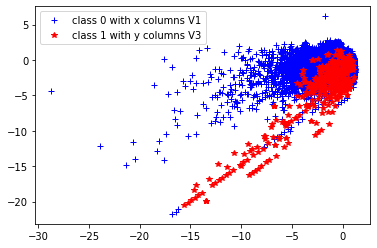

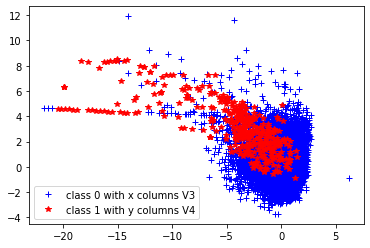

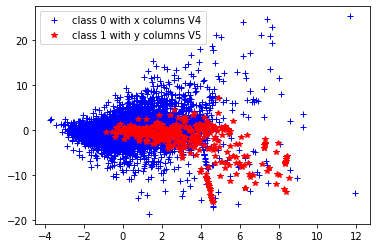

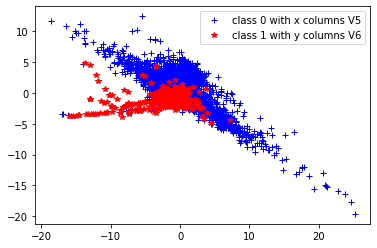

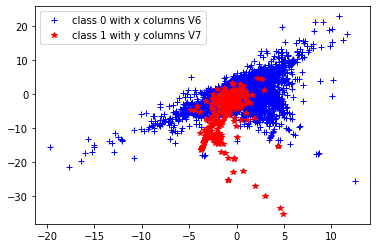

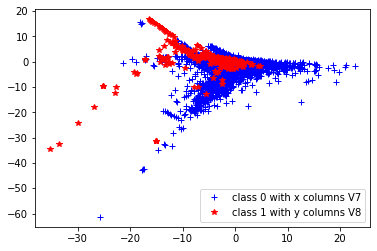

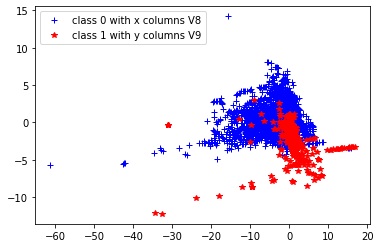

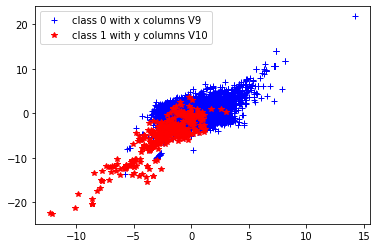

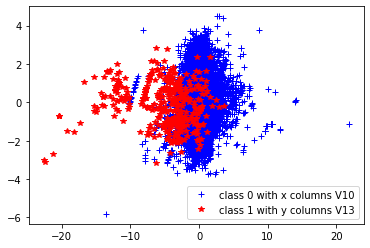

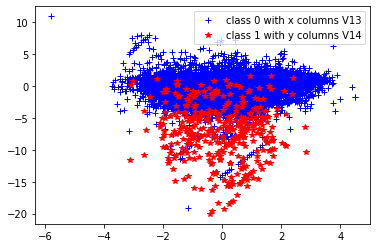

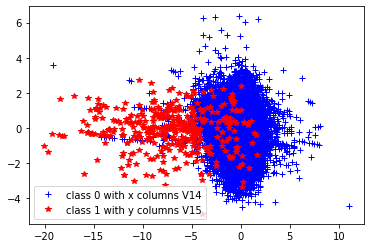

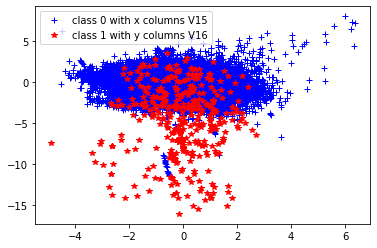

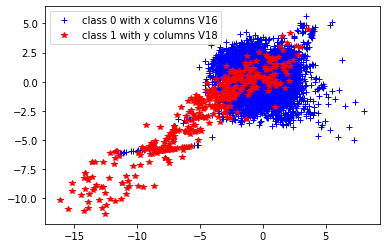

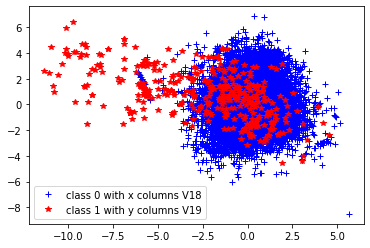

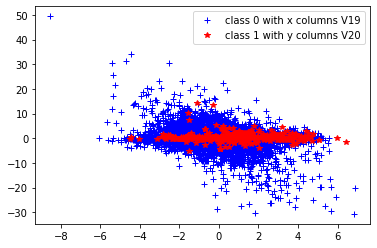

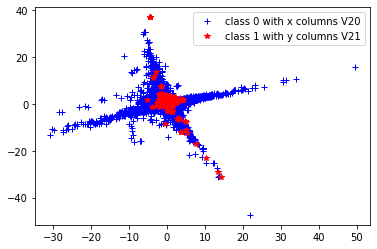

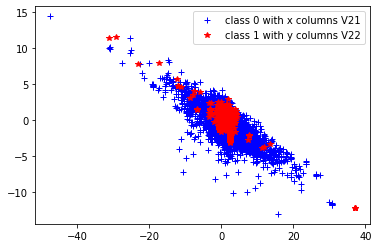

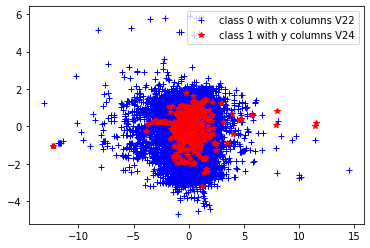

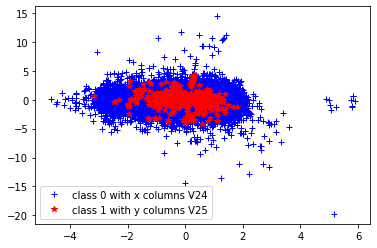

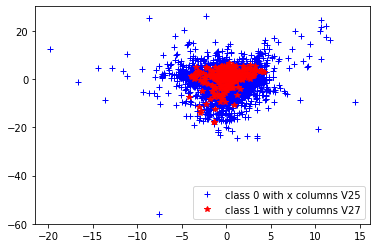

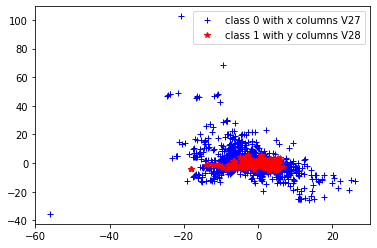

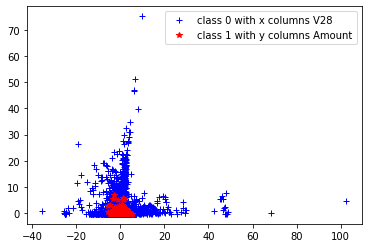

In [ ]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=100)

UX2, Uy2 = undersample.fit_resample(X_train_rfecvfit2, y_train)

for idx, x in enumerate(rfecvfit2_selected_values):
  if idx == len(rfecvfit2_selected_values)-1:
    break
  else:
    plt.plot(UX2[Uy2==0, idx], UX2[Uy2==0, idx+1], 'b+', label=f'class 0 with x columns {rfecvfit2_selected_values[idx]}')
    plt.plot(UX2[Uy2==1, idx], UX2[Uy2==1, idx+1], 'r*', label=f'class 1 with y columns {rfecvfit2_selected_values[idx+1]}')
    plt.legend()
    plt.show()

In [ ]:
print(Uy2.value_counts()), UX2.shape, Uy2.shape

0    46452
1      394
Name: Class, dtype: int64


(None, (46846, 20), (46846,))

언더 샘플링으로 가보자 UX2, Uy2가 그거임

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    n_estimators = 200, max_depth = 4, learning_rate = 0.1,
    validation_fraction = 0.1, n_iter_no_change = 10, tol = 0.00001
)
model.fit(UX2, Uy2)
#model.fit(OX2, Oy2)

GradientBoostingClassifier(max_depth=4, n_estimators=200, n_iter_no_change=10,
                           tol=1e-05)

In [ ]:
len(model.estimators_)

11

In [ ]:
X_test_rfecvfit = X_test[:, rfecvfit2.get_support()]
X_test_rfecvfit

array([[ 0.66232051,  0.29717676, -1.02649578, ...,  0.24713824,
         0.03130467, -0.27326767],
       [ 0.53164169,  0.60974508,  0.2679565 , ...,  0.02975186,
         0.03782811, -0.22189226],
       [-0.29123634, -0.39662645, -0.32369173, ...,  0.63957925,
         0.53541646, -0.19338591],
       ...,
       [ 0.99332349, -1.78652359,  0.97620765, ..., -0.05080274,
        -0.05768377, -0.04793553],
       [ 0.65206145,  0.12811051, -1.20253894, ...,  0.21574689,
         0.06417981, -0.23888413],
       [ 1.006469  , -0.45110694, -0.63678274, ..., -0.02054671,
        -0.14526098,  0.04258114]])

In [ ]:
y_pred = model.predict(X_test_rfecvfit)

NotFittedError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

confusion_matrix(y_test, y_pred)

NameError: ignored

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9991748885221726, 0.7431693989071038)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    n_estimators = 200, max_depth = 20, learning_rate = 0.1,
    validation_fraction = 0.1, n_iter_no_change = 10, tol = 0.00001
)
model.fit(UX2, Uy2)

X_test_rfecvfit = X_test[:, rfecvfit2.get_support()]
X_test_rfecvfit

y_pred = model.predict(X_test_rfecvfit)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9991222218320986, 0.7340425531914894)

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline

n_estimator = [50, 100, 150, 200, 250, 300]
learning_rate = [0.01, 0.02, 0.03]
max_depth = [2, 4, 6, 8, 10]

param_grid = dict(gb__n_estimators = n_estimator,
                  gb__max_depth = max_depth,
                  gb__learning_rate = learning_rate)

kf = StratifiedKFold(n_splits=10)

GBmodel = Pipeline(
    [('oss', OneSidedSelection(n_jobs=1, n_seeds_S=300)),
     ('gb', GradientBoostingClassifier())]
)

grid = RandomizedSearchCV(estimator=GBmodel, param_distributions=param_grid, verbose=3, scoring='f1', cv=kf)

grid_result = grid.fit(UX2, Uy2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.835 total time=  14.4s
[CV 2/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.883 total time=  13.6s
[CV 3/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.883 total time=  15.3s
[CV 4/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.812 total time=  14.2s
[CV 5/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.889 total time=  14.4s
[CV 6/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.750 total time=  14.3s
[CV 7/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.877 total time=  13.2s
[CV 8/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_estimators=300;, score=0.769 total time=  12.5s
[CV 9/10] END gb__learning_rate=0.02, gb__max_depth=2, gb__n_esti

In [ ]:
scores_df = pd.DataFrame(grid_result.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gb__n_estimators,param_gb__max_depth,param_gb__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.078817,0.318100,0.020709,0.000952,150,4,0.01,"{'gb__n_estimators': 150, 'gb__max_depth': 4, ...",0.860927,0.857143,0.840000,0.805195,0.842857,0.841224,0.019717,2
1,28.122478,1.782197,0.082829,0.001805,250,8,0.03,"{'gb__n_estimators': 250, 'gb__max_depth': 8, ...",0.844156,0.800000,0.855263,0.810811,0.791367,0.820319,0.025023,8
2,14.354087,1.611573,0.032441,0.001576,450,2,0.02,"{'gb__n_estimators': 450, 'gb__max_depth': 2, ...",0.881579,0.868966,0.826667,0.825806,0.820144,0.844632,0.025432,1
3,38.952184,3.977111,0.132831,0.004144,300,10,0.03,"{'gb__n_estimators': 300, 'gb__max_depth': 10,...",0.874172,0.772152,0.868966,0.847682,0.826087,0.837812,0.036983,3
4,22.504302,1.988010,0.059538,0.002408,400,4,0.03,"{'gb__n_estimators': 400, 'gb__max_depth': 4, ...",0.849673,0.844156,0.812500,0.805031,0.840580,0.830388,0.018046,5
5,6.193806,0.324791,0.012606,0.000402,150,2,0.03,"{'gb__n_estimators': 150, 'gb__max_depth': 2, ...",0.853333,0.833333,0.842105,0.821192,0.828571,0.835707,0.011125,4
6,15.694902,1.080105,0.038195,0.001548,250,4,0.03,"{'gb__n_estimators': 250, 'gb__max_depth': 4, ...",0.840764,0.851351,0.822785,0.792453,0.842857,0.830042,0.020971,6
7,27.841258,1.750681,0.074514,0.003424,350,6,0.01,"{'gb__n_estimators': 350, 'gb__max_depth': 6, ...",0.880000,0.782051,0.821918,0.842105,0.808511,0.826917,0.032940,7
8,9.304413,0.707794,0.020768,0.004523,250,2,0.02,"{'gb__n_estimators': 250, 'gb__max_depth': 2, ...",0.833333,0.823529,0.826667,0.790123,0.820144,0.818759,0.014964,9
9,46.707997,5.138543,0.144808,0.004237,350,10,0.01,"{'gb__n_estimators': 350, 'gb__max_depth': 10,...",0.812903,0.849673,0.837838,0.769231,0.811594,0.816248,0.027665,10


In [ ]:
a = grid_result.best_params_
a

{'gb__n_estimators': 450, 'gb__max_depth': 2, 'gb__learning_rate': 0.02}

In [ ]:
gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'], learning_rate = a['gb__learning_rate'])
gb_final.fit(UX2, Uy2)

GradientBoostingClassifier(learning_rate=0.02, max_depth=2, n_estimators=450)

In [ ]:
gb_final.feature_importances_

array([8.52646895e-04, 5.00088142e-04, 1.88233251e-03, 7.21511212e-03,
       9.47898050e-02, 2.89954505e-03, 1.14582396e-02, 1.58842897e-01,
       2.37667453e-04, 6.46606136e-01, 2.77836984e-04, 5.03502871e-02,
       4.94848356e-03, 7.31760560e-04, 1.80114793e-03, 1.64655383e-03,
       3.12842573e-04, 1.31502511e-02, 1.29156343e-04, 1.36721047e-03])

<BarContainer object of 20 artists>

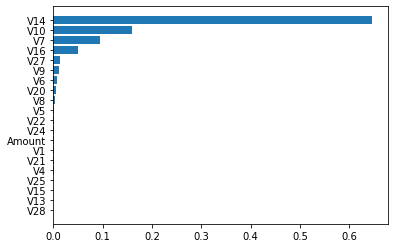

In [ ]:
fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit2.get_support()]).sort_values(ascending=True)
plt.barh(fimp.index, fimp.values)

In [ ]:
y_pred3= gb_final.predict(X_test_rfecvfit)
confusion_matrix(y_test, y_pred3)
f1_score(y_test, y_pred3)

0.7314285714285713

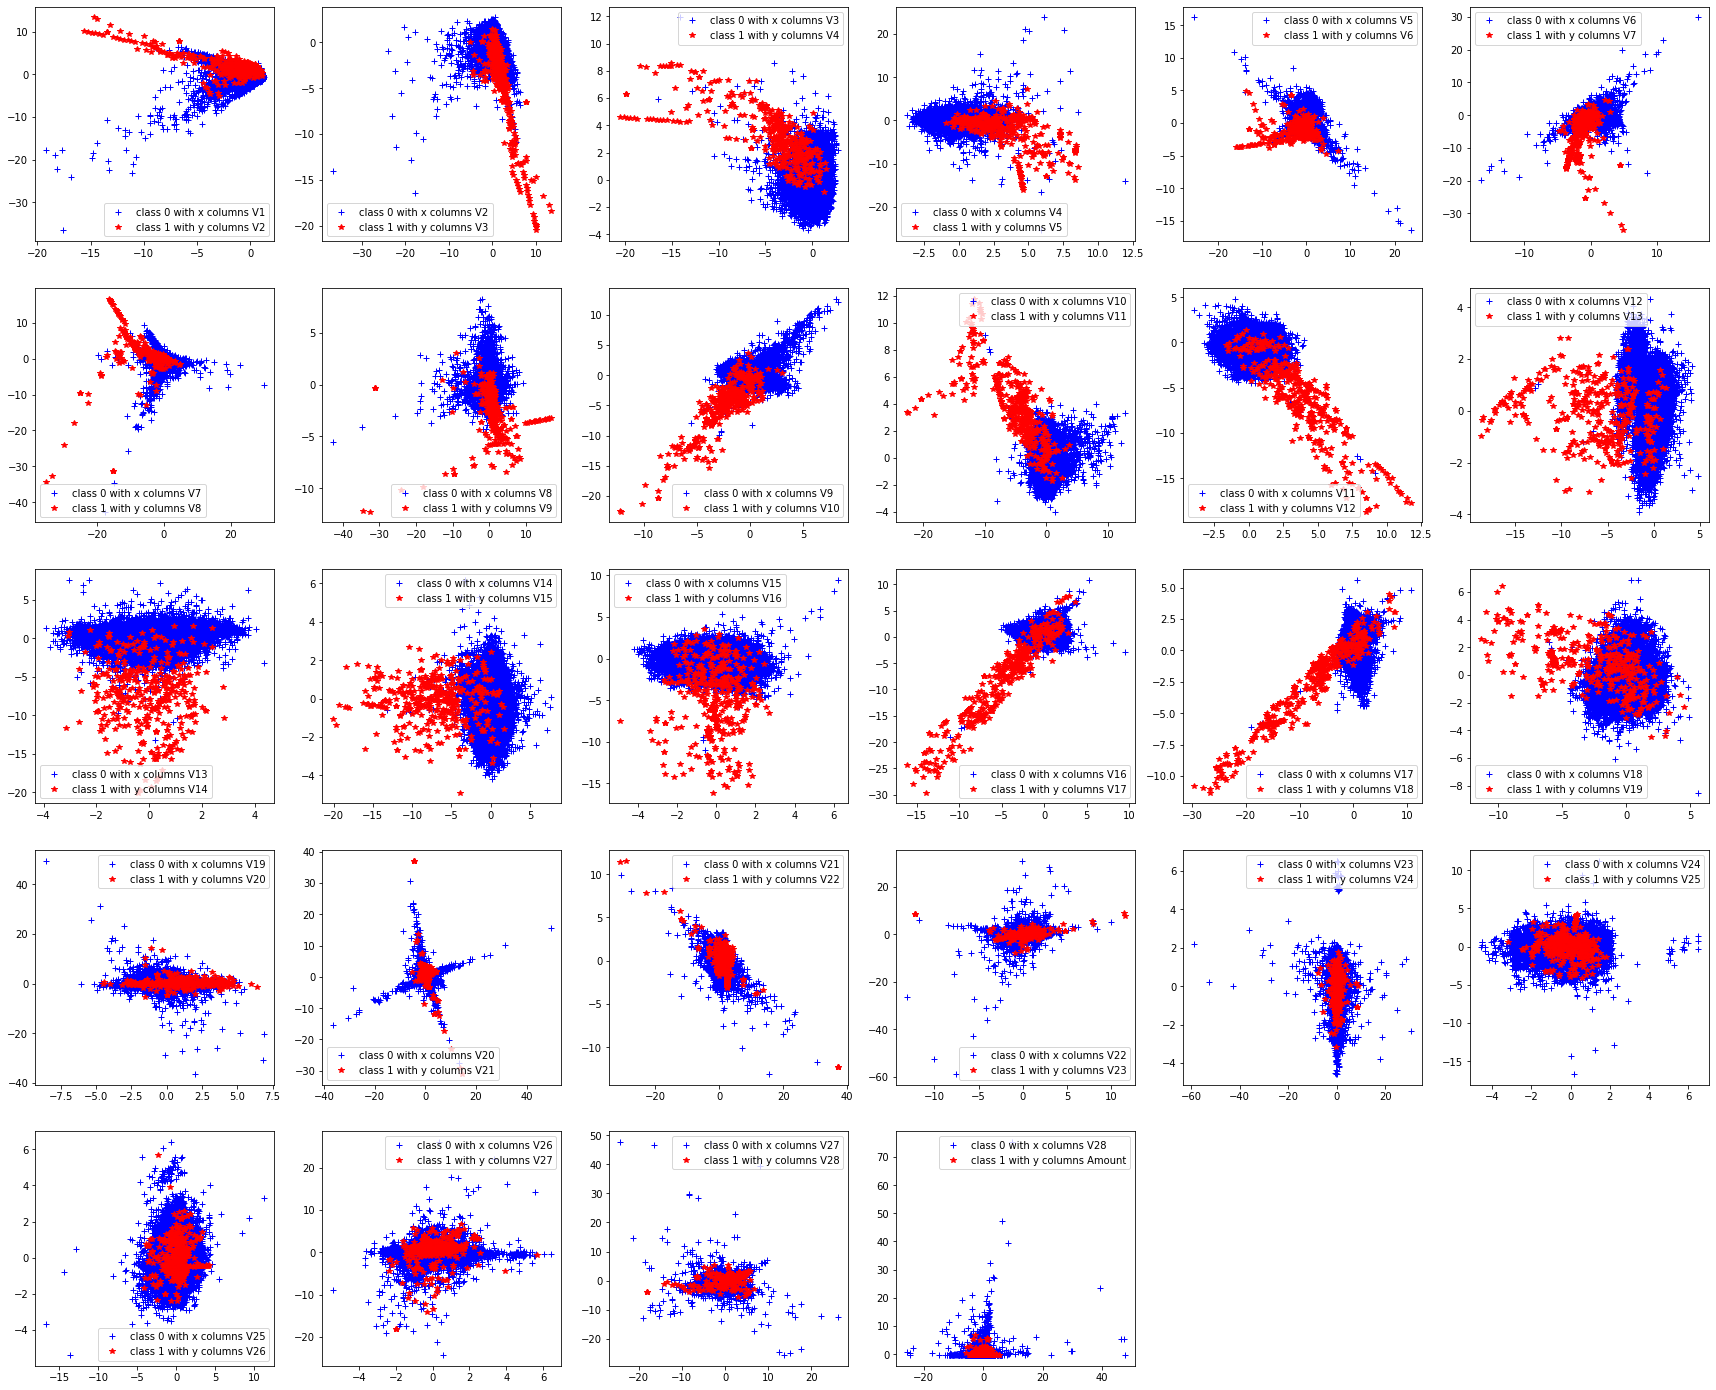

Index(['V1', 'V4', 'V5', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V18', 'V20', 'V21', 'V22', 'V24', 'V26', 'V27'],
      dtype='object') 18
(39794, 18)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gb__learning_rate=0.02, gb__max_depth=10, gb__n_estimators=100;, score=0.901 total time= 1.4min
[CV 2/5] END gb__learning_rate=0.02, gb__max_depth=10, gb__n_estimators=100;, score=0.857 total time= 1.5min
[CV 3/5] END gb__learning_rate=0.02, gb__max_depth=10, gb__n_estimators=100;, score=0.853 total time= 1.5min
[CV 4/5] END gb__learning_rate=0.02, gb__max_depth=10, gb__n_estimators=100;, score=0.855 total time= 1.5min
[CV 5/5] END gb__learning_rate=0.02, gb__max_depth=10, gb__n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END gb__learning_rate=0.03, gb__max_depth=4, gb__n_estimators=50;, score=0.919 total time=  18.1s
[CV 2/5] END gb__learning_rate=0.03, gb__max_depth=4, gb__n_estimators=50;, score=0.871 total time=  18.2s
[CV 3/5] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py"

f1 score = 0.7715736040609136


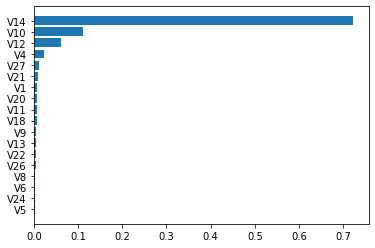

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, f1_score

imbalance_y_ratio = 0.01

RUS = RandomUnderSampler(sampling_strategy=imbalance_y_ratio)

UX, Uy = RUS.fit_resample(X_train, y_train)

yplot_num = 5
xplot_num = int(np.round(len(X_train[0,:]), -1)/yplot_num)

plt.figure(figsize=(xplot_num * 5, yplot_num * 5))
for idx, x in enumerate(X.columns):
    if idx == len(X.columns)-1:
        break
    else:
        plt.subplot(yplot_num, xplot_num, idx+1)
        plt.plot(UX[Uy==0, idx], UX[Uy==0, idx+1], 'b+', label=f'class 0 with x columns {X.columns[idx]}')
        plt.plot(UX[Uy==1, idx], UX[Uy==1, idx+1], 'r*', label=f'class 1 with y columns {X.columns[idx+1]}')
        plt.legend()

plt.show()

UX.shape, Uy.shape, Uy.value_counts()

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model, cv=5)
rfecvfit = rfecv.fit(UX, Uy)

rfecvfit_selected_values = X.columns[rfecvfit.get_support()]
print(rfecvfit_selected_values, len(rfecvfit_selected_values), sep=' ')

X_train_rfecvfit = UX[:, rfecvfit.get_support()]
X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
y_train_rfecvfit = Uy
y_test_rfecvfit = y_test

print(X_train_rfecvfit.shape)

n_estimator = [50, 100, 150, 200, 250, 300]
learning_rate = [0.01, 0.02, 0.03]
max_depth = [2, 4, 6, 8, 10]

param_grid = dict(gb__n_estimators = n_estimator,
                  gb__max_depth = max_depth,
                  gb__learning_rate = learning_rate)

kf = StratifiedKFold(n_splits=5)

GBmodel = Pipeline(
    [('oss', RandomUnderSampler(sampling_strategy=imbalance_y_ratio)),
     ('gb', GradientBoostingClassifier())]
)

grid = RandomizedSearchCV(estimator=GBmodel, param_distributions=param_grid, verbose=3, scoring='f1', cv=kf)

grid_result = grid.fit(X_train_rfecvfit, y_train_rfecvfit)

scores_df = pd.DataFrame(grid_result.cv_results_)
scores_df.head()

a = grid_result.best_params_

gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'], learning_rate = a['gb__learning_rate'])
gb_final.fit(X_train_rfecvfit, y_train_rfecvfit)

gb_final.feature_importances_
gb_final.feature_importances_, X.columns[rfecvfit.get_support()]

fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit.get_support()]).sort_values(ascending=True)
plt.barh(fimp.index, fimp.values)

y_pred3 = gb_final.predict(X_test_rfecvfit)
confusion_matrix(y_test, y_pred3)

print(f'f1 score = {f1_score(y_test, y_pred3)}')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler



model = LogisticRegression()
rfecv = RFECV(model, cv=5)
rfecvfit = rfecv.fit(UX, Uy)

rfecvfit_selected_values = X.columns[rfecvfit.get_support()]
print(rfecvfit_selected_values, len(rfecvfit_selected_values), sep=' ')

X_train_rfecvfit = UX[:, rfecvfit.get_support()]
X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
y_train_rfecvfit = Uy
y_test_rfecvfit = y_test

print(X_train_rfecvfit.shape)


RUS = RandomUnderSampler(sampling_strategy=0.1)

UX, Uy = RUS.fit_resample(X_train, y_train)

# yplot_num = 5
# xplot_num = int(np.round(len(X_train[0,:]), -1)/yplot_num)

# plt.figure(figsize=(xplot_num * 5, yplot_num * 5))
# for idx, x in enumerate(X.columns):
#     if idx == len(X.columns)-1:
#         break
#     else:
#         plt.subplot(yplot_num, xplot_num, idx+1)
#         plt.plot(UX[Uy==0, idx], UX[Uy==0, idx+1], 'b+', label=f'class 0 with x columns {X.columns[idx]}')
#         plt.plot(UX[Uy==1, idx], UX[Uy==1, idx+1], 'r*', label=f'class 1 with y columns {X.columns[idx+1]}')
#         plt.legend()

# plt.show()

print(UX.shape, Uy.shape, Uy.value_counts(), sep='\n')




n_estimator = [50, 100]
learning_rate = [0.01, 0.02]
max_depth = [2, 4, 6]
imbalance_y_ratio = [0.005, 0.01]

param_grid = dict(uss__sampling_strategy
                  gb__n_estimators = n_estimator,
                  gb__max_depth = max_depth,
                  gb__learning_rate = learning_rate)

kf = StratifiedKFold(n_splits=5)

GBmodel = Pipeline(
    [('uss', RandomUnderSampler(sampling_strategy=imbalance_y_ratio)),
    [('gb', GradientBoostingClassifier())]
)

grid = RandomizedSearchCV(estimator=GBmodel, param_distributions=param_grid, verbose=3, scoring='f1', cv=kf)

grid_result = grid.fit(X_train_rfecvfit, y_train_rfecvfit)

scores_df = pd.DataFrame(grid_result.cv_results_)
scores_df.head()

a = grid_result.best_params_
a


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=50, oss__sampling_strategy=0.01;, score=0.000 total time= 1.1min
[CV 2/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=50, oss__sampling_strategy=0.01;, score=0.000 total time=  29.8s
[CV 3/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=50, oss__sampling_strategy=0.01;, score=0.000 total time=  37.2s
[CV 4/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=50, oss__sampling_strategy=0.01;, score=0.000 total time=  36.4s
[CV 5/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=50, oss__sampling_strategy=0.01;, score=0.000 total time=  41.8s
[CV 1/5] END gb__learning_rate=0.01, gb__max_depth=6, gb__n_estimators=50, oss__sampling_strategy=0.005;, score=0.000 total time= 1.6min
[CV 2/5] END gb__learning_rate=0.01, gb__max_depth=6, gb__n_estimators=50, oss__sampling_strategy=0.005;, score=0.000 tota

KeyboardInterrupt: ignored

In [ ]:
n_estimator = [50, 100]
learning_rate = [0.01, 0.02]
max_depth = [2, 4, 6]
imbalance_y_ratio = [0.005, 0.01]

param_grid = dict(oss__sampling_strategy = imbalance_y_ratio,
                  gb__n_estimators = n_estimator,
                  gb__max_depth = max_depth,
                  gb__learning_rate = learning_rate)

kf = StratifiedKFold(n_splits=5)

GBmodel = Pipeline(
    [('oss', RandomUnderSampler()),
     ('fs', RFECV(LogisticRegression(), cv=5)),
     ('gb', GradientBoostingClassifier())]
)

grid = RandomizedSearchCV(estimator=GBmodel, param_distributions=param_grid, verbose=3, scoring='f1', cv=kf)

grid_result = grid.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_result.cv_results_)
scores_df.head()

a = grid_result.best_params_
a

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=100, oss__sampling_strategy=0.01;, score=0.825 total time=  47.1s
[CV 2/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=100, oss__sampling_strategy=0.01;, score=0.828 total time= 1.2min
[CV 3/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=100, oss__sampling_strategy=0.01;, score=0.807 total time=  47.9s
[CV 4/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=100, oss__sampling_strategy=0.01;, score=0.781 total time=  46.4s
[CV 5/5] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=100, oss__sampling_strategy=0.01;, score=0.830 total time= 1.0min
[CV 1/5] END gb__learning_rate=0.01, gb__max_depth=6, gb__n_estimators=50, oss__sampling_strategy=0.005;, score=0.000 total time= 1.5min
[CV 2/5] END gb__learning_rate=0.01, gb__max_depth=6, gb__n_estimators=50, oss__sampling_strategy=0.005;, score=0.000

{'oss__sampling_strategy': 0.005,
 'gb__n_estimators': 100,
 'gb__max_depth': 4,
 'gb__learning_rate': 0.01}

In [20]:
a = {'oss__sampling_strategy': 0.005,
 'gb__n_estimators': 100,
 'gb__max_depth': 4,
 'gb__learning_rate': 0.01}

In [21]:
a

{'oss__sampling_strategy': 0.005,
 'gb__n_estimators': 100,
 'gb__max_depth': 4,
 'gb__learning_rate': 0.01}

f1 score = 0.783068783068783


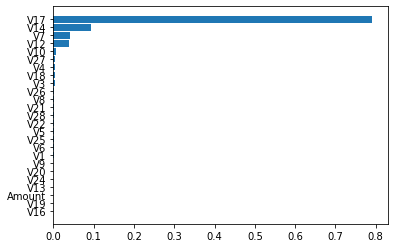

In [22]:
RUS = RandomUnderSampler(sampling_strategy=a['oss__sampling_strategy'])

UX, Uy = RUS.fit_resample(X_train, y_train)

model = LogisticRegression()
rfecv = RFECV(model, cv=5)
rfecvfit = rfecv.fit(UX, Uy)

X_train_rfecvfit = UX[:, rfecvfit.get_support()]
X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
y_train_rfecvfit = Uy
y_test_rfecvfit = y_test

gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'],\
                                      learning_rate = a['gb__learning_rate'])
gb_final.fit(X_train_rfecvfit, y_train_rfecvfit)

fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit.get_support()]).sort_values(ascending=True)
plt.barh(fimp.index, fimp.values)

y_pred3 = gb_final.predict(X_test_rfecvfit)
confusion_matrix(y_test, y_pred3)

print(f'f1 score = {f1_score(y_test, y_pred3)}')

f1 score = 0.7840909090909091


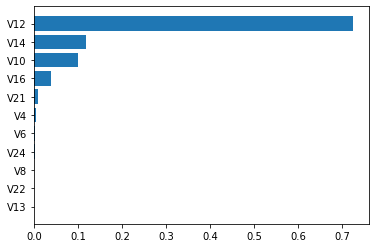

In [19]:
RUS = RandomUnderSampler(sampling_strategy=a['oss__sampling_strategy'])

UX, Uy = RUS.fit_resample(X_train, y_train)

model = LogisticRegression()
rfecv = RFECV(model, cv=5)
rfecvfit = rfecv.fit(UX, Uy)

X_train_rfecvfit = UX[:, rfecvfit.get_support()]
X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
y_train_rfecvfit = Uy
y_test_rfecvfit = y_test

gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'],\
                                      learning_rate = a['gb__learning_rate'])
gb_final.fit(X_train_rfecvfit, y_train_rfecvfit)

fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit.get_support()]).sort_values(ascending=True)
plt.barh(fimp.index, fimp.values)

y_pred3 = gb_final.predict(X_test_rfecvfit)
confusion_matrix(y_test, y_pred3)

print(f'f1 score = {f1_score(y_test, y_pred3)}')